<a href="https://colab.research.google.com/github/sadiaanzum/MLDLS_2022/blob/main/Assignment-1_Problem-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2: Implement a Multi-variate Linear Regression after finding your own data **

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv
User uploaded file "CarPrice_Assignment.csv" with length 26717 bytes


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
df=pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64



There are no **MISSING VALUES**




In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


**Columns that do not significantly affect the price of the car, and hence will be dropped are:** 

car_ID, CarName, fueltype, aspiration, doornumber, drivewheel, enginelocation, symboling, drivewheel.

Let us plot a heatmap to check the correlation of the features with the target variable i.e. price








<Figure size 1440x1440 with 0 Axes>

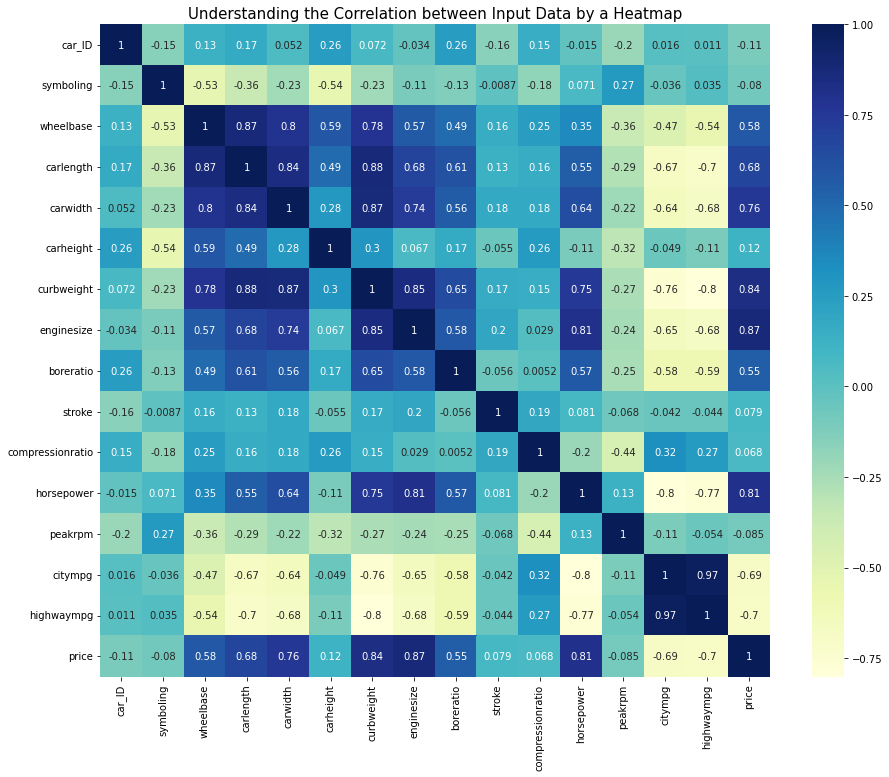

In [ ]:
plt.figure(figsize=(20,20))
c = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Understanding the Correlation between Input Data by a Heatmap', fontsize=15)
plt.show()

As per the Heatmap, the follwing features are **poorly correlated** with the target variable and hence can be dropped:

**car_ID,symboling,carheight,stroke,compressionratio,peakrpm,citympg,highwaympg**

In [ ]:
drop_fea={'car_ID', 'CarName', 'carheight','stroke','carbody','enginetype','cylindernumber','fuelsystem','compressionratio','peakrpm','citympg','highwaympg','fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'symboling', 'drivewheel'}

In [ ]:
data=df.drop(drop_fea,axis=1)

In [ ]:
data.head()


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0


In [ ]:
data.shape

(205, 8)

In [ ]:
#Splitting into independent and dependent variables
X= data.iloc[:,0:7].values
y= data.iloc[:,7].values

In [ ]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.coef_[:]

array([   11.58870828,   -36.99595062,   773.3551444 ,     2.74387444,
          70.85066552, -1009.36498456,    60.52236059])

In [ ]:
regressor.predict(X_test)

array([ 6184.78293067, 20495.96153364, 14433.67988899,  -578.88097258,
       10907.02774145, 15026.36292176,  6580.082828  ,  6102.66427224,
       23336.41294182,  7145.91723137, 16393.81665429, 36236.71926881,
        8513.95568359, 12268.97109668,  5916.55063106, 14675.14699291,
       12821.27024488, 19104.09761205,  9909.43747632,  5755.05425694,
       12021.47572869, 15048.37837474, 12745.96566839, 15122.39852731,
       22205.22376952,  5942.40593869,  7041.63664103, 15246.25027257,
        7154.13549324,  5982.89073508,  9749.49975816, 11599.26675389,
       19276.30012737, 11982.29779503,  6117.34058284, 26594.57714709,
        9596.52562793, 16672.1629912 ,  5859.12568368, 37253.42931297,
        5820.51502551])